# Описание задачи
На основе данных из датасета предсказывать, произойдет ли задержка рейса. Рассмотрим данные за январь 2019 года. 

## Загружаем нужные библиотеки:

In [42]:
import numpy as np              # Массивы (матрицы, векторы, линейная алгебра)
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn                  # Алгоритмы машинного обучения
import matplotlib.pyplot as plt # Научная графика
%matplotlib inline 
    # Говорим jupyter'у, чтобы весь графический вывод был в браузере, а не в отдельном окне

Загрузим данные:

In [43]:
data = pd.read_csv("Jan_2019_ontime.csv")
data

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,...,DEST_AIRPORT_SEQ_ID,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE
0,1,2,9E,20363,9E,N8688C,3280,11953,1195302,GNV,...,1039707,ATL,601.0,0.0,0600-0659,722.0,0.0,0.0,0.0,300.0
1,1,2,9E,20363,9E,N348PQ,3281,13487,1348702,MSP,...,1119302,CVG,1359.0,0.0,1400-1459,1633.0,0.0,0.0,0.0,596.0
2,1,2,9E,20363,9E,N8896A,3282,11433,1143302,DTW,...,1119302,CVG,1215.0,0.0,1200-1259,1329.0,0.0,0.0,0.0,229.0
3,1,2,9E,20363,9E,N8886A,3283,15249,1524906,TLH,...,1039707,ATL,1521.0,0.0,1500-1559,1625.0,0.0,0.0,0.0,223.0
4,1,2,9E,20363,9E,N8974C,3284,10397,1039707,ATL,...,1177801,FSM,1847.0,0.0,1900-1959,1940.0,0.0,0.0,0.0,579.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583980,31,4,UA,19977,UA,N776UA,200,12016,1201602,GUM,...,1217305,HNL,749.0,0.0,0700-0759,1832.0,0.0,0.0,0.0,3801.0
583981,31,4,UA,19977,UA,N36280,174,12016,1201602,GUM,...,1495503,SPN,717.0,0.0,0700-0759,759.0,0.0,0.0,0.0,129.0
583982,31,4,UA,19977,UA,N36280,117,14955,1495503,SPN,...,1201602,GUM,857.0,0.0,0900-0959,933.0,0.0,0.0,0.0,129.0
583983,31,4,UA,19977,UA,N39726,105,14955,1495503,SPN,...,1201602,GUM,1820.0,0.0,1800-1859,1854.0,0.0,0.0,0.0,129.0


Количество строк и столбцов:

In [44]:
data.shape

(583985, 21)

## Описание признаков

DAY_OF_MONTH - День месяца.

DAY_OF_WEEK	- День недели (1 - понедельник, 2 - вторник и т.д.).

OP_UNIQUE_CARRIER - Уникальный код оператора связи. Когда один и тот же код использовался несколькими операторами связи, то используется числовой суффикс, например PA, PA (1), PA (2). 

OP_CARRIER_AIRLINE_ID - Идентификационный номер, присвоенный Министерством транспорта США для идентификации уникальной авиакомпании (перевозчика).

OP_CARRIER - Код, присвоенный IATA, обычно используемый для идентификации перевозчика. 

TAIL_NUM - Бортовой номер.

OP_CARRIER_FL_NUM - Номер полета.

ORIGIN_AIRPORT_ID - Аэропорт отправления, идентификатор аэропорта. Идентификационный номер, присвоенный Министерством транспорта США для идентификации уникального аэропорта.

ORIGIN_AIRPORT_SEQ_ID - Аэропорт отправления, идентификатор последовательности аэропорта. Идентификационный номер, присвоенный Министерством транспорта США для идентификации уникального аэропорта в определенный момент времени. 

ORIGIN - Аэропорт отправления.

DEST_AIRPORT_ID - Аэропорт прибытия, идентификатор аэропорта. Идентификационный номер, присвоенный Министерством транспорта США для идентификации уникального аэропорта.


DEST_AIRPORT_SEQ_ID -  Аэропорт прибытия, идентификатор последовательности аэропорта. Идентификационный номер, присвоенный Министерством транспорта США для идентификации уникального аэропорта в определенный момент времени. 

DEST - Аэропорт прибытия.

DEP_TIME - Фактическое время отправления (местное время: ччмм).

DEP_DEL15 - Индикатор задержки отправления, 15 минут или более (1 = да, 0 = нет).

DEP_TIME_BLK - Задержка времени отправления, почасовые интервалы (ччмм).

ARR_TIME - Фактическое время прибытия (местное время: ччмм).

ARR_DEL15 - Индикатор задержки прибытия, 15 минут или более (1 = да, 0 = нет).

CANCELLED - Индикатор отмены полета (1 = да, 0 = нет).

DIVERTED - Индикатор перенаправления полета (1 = да, 0 = нет).

DISTANCE - Расстояние между аэропортами (в милях). 

### Рассмотрим типы данных всех столбцов:

In [25]:
data.dtypes

DAY_OF_MONTH               int64
DAY_OF_WEEK                int64
OP_UNIQUE_CARRIER         object
OP_CARRIER_AIRLINE_ID      int64
OP_CARRIER                object
TAIL_NUM                  object
OP_CARRIER_FL_NUM          int64
ORIGIN_AIRPORT_ID          int64
ORIGIN_AIRPORT_SEQ_ID      int64
ORIGIN                    object
DEST_AIRPORT_ID            int64
DEST_AIRPORT_SEQ_ID        int64
DEST                      object
DEP_TIME                 float64
DEP_DEL15                float64
DEP_TIME_BLK              object
ARR_TIME                 float64
ARR_DEL15                float64
CANCELLED                float64
DIVERTED                 float64
DISTANCE                 float64
dtype: object

Выделим категориальные признаки:

In [45]:
data["DAY_OF_MONTH"] = data["DAY_OF_MONTH"].astype('category')
data["DAY_OF_WEEK"] = data["DAY_OF_WEEK"].astype('category')
data["OP_UNIQUE_CARRIER"] = data["OP_UNIQUE_CARRIER"].astype('category')
data["OP_CARRIER_AIRLINE_ID"] = data["OP_CARRIER_AIRLINE_ID"].astype('category')
data["OP_CARRIER"] = data["OP_CARRIER"].astype('category')
data["TAIL_NUM"] = data["TAIL_NUM"].astype('category')
data["OP_CARRIER_FL_NUM"] = data["OP_CARRIER_FL_NUM"].astype('category')
data["ORIGIN_AIRPORT_ID"] = data["ORIGIN_AIRPORT_ID"].astype('category')
data["ORIGIN_AIRPORT_SEQ_ID"] = data["ORIGIN_AIRPORT_SEQ_ID"].astype('category')
data["ORIGIN"] = data["ORIGIN"].astype('category')
data["DEST_AIRPORT_ID"] = data["DEST_AIRPORT_ID"].astype('category')
data["DEST_AIRPORT_SEQ_ID"] = data["DEST_AIRPORT_SEQ_ID"].astype('category')
data["DEST"] = data["DEST"].astype('category')
data["DEP_TIME_BLK"] = data["DEP_TIME_BLK"].astype('category')

Выделим бинарные признаки:

In [46]:
data["DEP_DEL15"] = data["DEP_DEL15"].astype('bool')
data["ARR_DEL15"] = data["ARR_DEL15"].astype('bool')
data["CANCELLED"] = data["CANCELLED"].astype('bool')
data["DIVERTED"] = data["DIVERTED"].astype('bool')

In [47]:
data.dtypes

DAY_OF_MONTH             category
DAY_OF_WEEK              category
OP_UNIQUE_CARRIER        category
OP_CARRIER_AIRLINE_ID    category
OP_CARRIER               category
TAIL_NUM                 category
OP_CARRIER_FL_NUM        category
ORIGIN_AIRPORT_ID        category
ORIGIN_AIRPORT_SEQ_ID    category
ORIGIN                   category
DEST_AIRPORT_ID          category
DEST_AIRPORT_SEQ_ID      category
DEST                     category
DEP_TIME                  float64
DEP_DEL15                    bool
DEP_TIME_BLK             category
ARR_TIME                  float64
ARR_DEL15                    bool
CANCELLED                    bool
DIVERTED                     bool
DISTANCE                  float64
dtype: object

## Пропущенные и лишние значения

In [48]:
data.isna().sum()

DAY_OF_MONTH                 0
DAY_OF_WEEK                  0
OP_UNIQUE_CARRIER            0
OP_CARRIER_AIRLINE_ID        0
OP_CARRIER                   0
TAIL_NUM                  2543
OP_CARRIER_FL_NUM            0
ORIGIN_AIRPORT_ID            0
ORIGIN_AIRPORT_SEQ_ID        0
ORIGIN                       0
DEST_AIRPORT_ID              0
DEST_AIRPORT_SEQ_ID          0
DEST                         0
DEP_TIME                 16352
DEP_DEL15                    0
DEP_TIME_BLK                 0
ARR_TIME                 17061
ARR_DEL15                    0
CANCELLED                    0
DIVERTED                     0
DISTANCE                     0
dtype: int64

Теперь необходимо избавиться от лишних данных. Во-первый, нет смысла рассматривать отмененные рейсы, а также перенаправленные полеты, так как мы рассматриваем только задержку прибытия рейсов. Во-вторых, с большей вероятностью отсутствие информации о времени прибытия или отправления как правило обусловлено отменой или перенаправлением рейса. Так или иначе при таком большом количестве данных можно отбросить строки с отсутствующими значениями прибытия или отправки.

In [49]:
data.drop(data[data.CANCELLED == 1].index, inplace=True)
data.drop(data[data.DIVERTED == 1].index, inplace=True)

In [50]:
data.shape

(565963, 21)

Следует отметить, что столбцы 'ORIGIN_AIRPORT_ID, 'ORIGIN_AIRPORT_SEQ_ID' несут в себе в другом виде информацию столбца 'ORIGIN', аналогично оставим вместо столбцов 'DEST_AIRPORT_ID',' DEST_AIRPORT_SEQ_ID ' только 'DEST', вместо 'OP_CARRIER_AIRLINE_ID' 'OP_UNIQUE_CARRIER'.

Можно отбросить 'TAIL_NUM' и 'OP_CARRIER_FL_NUM', так как по бортовому номеру самолета и номеру полета невозможно предугадать задержку рейса. 'CANCELED' и 'DIVERTED'  нам больше не нужны, потому что мы не рассматриваем отмененные и перенаправленные рейсы, таким образом значение в этих колонках всегда будет нулевым и не повлияет на результат.

In [51]:
data.drop(['OP_CARRIER_AIRLINE_ID','TAIL_NUM','OP_CARRIER_FL_NUM','ORIGIN_AIRPORT_ID','ORIGIN_AIRPORT_SEQ_ID','DEST_AIRPORT_ID','DEST_AIRPORT_SEQ_ID','OP_CARRIER','CANCELLED', 'DIVERTED'], axis='columns', inplace=True)

In [52]:
data.shape

(565963, 11)

In [53]:
data.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,ORIGIN,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,DISTANCE
0,1,2,9E,GNV,ATL,601.0,False,0600-0659,722.0,False,300.0
1,1,2,9E,MSP,CVG,1359.0,False,1400-1459,1633.0,False,596.0
2,1,2,9E,DTW,CVG,1215.0,False,1200-1259,1329.0,False,229.0
3,1,2,9E,TLH,ATL,1521.0,False,1500-1559,1625.0,False,223.0
4,1,2,9E,ATL,FSM,1847.0,False,1900-1959,1940.0,False,579.0


Проверим, остались ли пропущенные значения.

In [54]:
data.isna().sum()

DAY_OF_MONTH         0
DAY_OF_WEEK          0
OP_UNIQUE_CARRIER    0
ORIGIN               0
DEST                 0
DEP_TIME             0
DEP_DEL15            0
DEP_TIME_BLK         0
ARR_TIME             0
ARR_DEL15            0
DISTANCE             0
dtype: int64

Теперь нет отсутствующих значений и лишних столбцов.

## Визуализация и описательная статистика

Построим матрицу корреляции для количественных признаков и визуализируем:

In [55]:
data_corr = data.corr()
data_corr

,DEP_TIME,DEP_DEL15,ARR_TIME,ARR_DEL15,DISTANCE
DEP_TIME,1.000000,0.190526,0.672891,0.143283,-0.026949
DEP_DEL15,0.190526,1.000000,0.088508,0.719430,0.011393
ARR_TIME,0.672891,0.088508,1.000000,0.062031,0.020906
ARR_DEL15,0.143283,0.719430,0.062031,1.000000,0.003407
DISTANCE,-0.026949,0.011393,0.020906,0.003407,1.000000


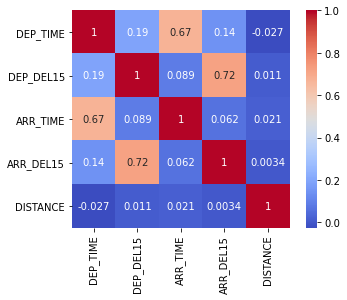

In [56]:
sns.heatmap(data_corr,annot = True, square=True, cmap='coolwarm')
pass

Очевидно, что время прибытия зависит от времени отправления. Время идет в формате ччмм.

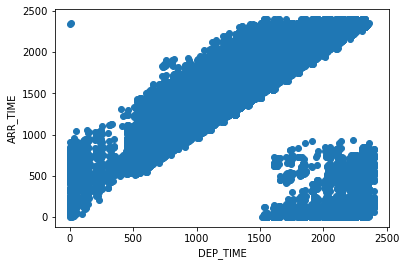

In [57]:
plt.scatter(data['DEP_TIME'], data['ARR_TIME'], alpha=1)
plt.xlabel('DEP_TIME')
plt.ylabel('ARR_TIME')
pass

In [58]:
data.describe(include = 'all')

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,ORIGIN,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,DISTANCE
count,565963.0,565963.0,565963,565963,565963,565963.000000,565963,565963,565963.000000,565963,565963.000000
unique,31.0,7.0,17,346,346,NaN,2,19,NaN,2,NaN
top,2.0,4.0,WN,ATL,ATL,NaN,False,0600-0659,NaN,False,NaN
freq,20170.0,96473.0,107235,30783,30797,NaN,467658,40616,NaN,460741,NaN
mean,NaN,NaN,NaN,NaN,NaN,1331.830093,NaN,NaN,1484.411454,NaN,802.395135
std,NaN,NaN,NaN,NaN,NaN,495.390348,NaN,NaN,522.973859,NaN,592.326244
min,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,1.000000,NaN,31.000000
25%,NaN,NaN,NaN,NaN,NaN,921.000000,NaN,NaN,1104.000000,NaN,366.000000
50%,NaN,NaN,NaN,NaN,NaN,1328.000000,NaN,NaN,1517.000000,NaN,642.000000
75%,NaN,NaN,NaN,NaN,NaN,1738.000000,NaN,NaN,1919.000000,NaN,1045.000000


Рассмотрим количиство задержек прибытия в зависимости от разных факторов:

Text(0.5, 1.0, 'Частота опозданий, группировка по авиакомпаниям')

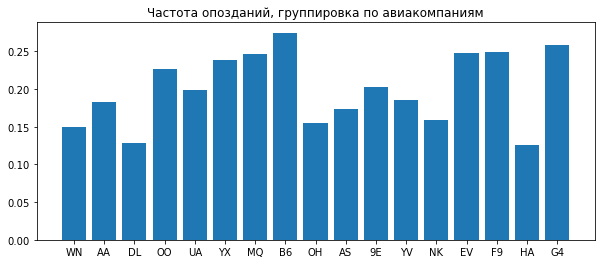

In [66]:
arr_dels = pd.DataFrame(data['OP_UNIQUE_CARRIER'].value_counts()).join(data['ARR_DEL15'].groupby(data['OP_UNIQUE_CARRIER']).sum())
company_dels = arr_dels['ARR_DEL15']/arr_dels['OP_UNIQUE_CARRIER']
plt.figure(figsize=(10,4))
plt.bar(np.arange(len(company_dels)), company_dels)
plt.xticks(np.arange(len(company_dels)), company_dels.index);
plt.title('Частота опозданий, группировка по авиакомпаниям')

Text(0.5, 1.0, 'Частота опозданий, группировка по дню недели')

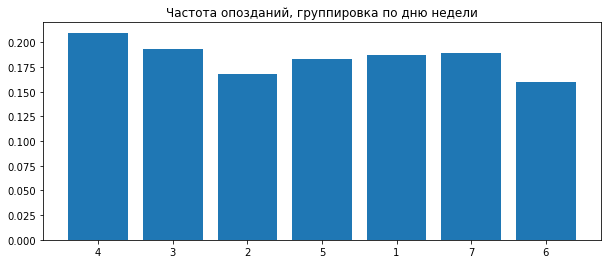

In [67]:
arr_dels = pd.DataFrame(data['DAY_OF_WEEK'].value_counts()).join(data['ARR_DEL15'].groupby(data['DAY_OF_WEEK']).sum())
day_dels = arr_dels['ARR_DEL15']/arr_dels['DAY_OF_WEEK']
plt.figure(figsize=(10,4))
plt.bar(np.arange(len(day_dels)), day_dels)
plt.xticks(np.arange(len(day_dels)), day_dels.index);
plt.title('Частота опозданий, группировка по дню недели')

Text(0.5, 1.0, 'Частота опозданий, группировка по дню месяца')

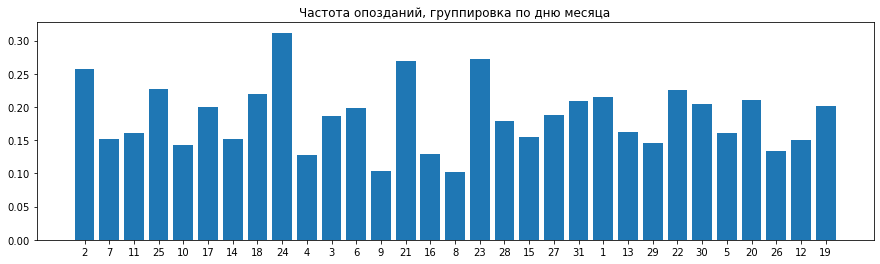

In [68]:
arr_dels = pd.DataFrame(data['DAY_OF_MONTH'].value_counts()).join(data['ARR_DEL15'].groupby(data['DAY_OF_MONTH']).sum())
day_dels = arr_dels['ARR_DEL15']/arr_dels['DAY_OF_MONTH']
plt.figure(figsize=(15,4))
plt.bar(np.arange(len(day_dels)), day_dels)
plt.xticks(np.arange(len(day_dels)), day_dels.index);
plt.title('Частота опозданий, группировка по дню месяца')

Значения отличаются, но четкую зависимость проследить сложно.

## Обработка категориальных признаков

In [69]:
data['OP_UNIQUE_CARRIER'].unique(), data['ORIGIN'].unique(), data['DEST'].unique()

(['9E', 'AA', 'MQ', 'G4', 'OH', ..., 'OO', 'WN', 'AS', 'UA', 'DL']
 Length: 17
 Categories (17, object): ['9E', 'AA', 'MQ', 'G4', ..., 'WN', 'AS', 'UA', 'DL'],
 ['GNV', 'MSP', 'DTW', 'TLH', 'ATL', ..., 'OWB', 'OGS', 'PPG', 'OGD', 'LYH']
 Length: 346
 Categories (346, object): ['GNV', 'MSP', 'DTW', 'TLH', ..., 'OGS', 'PPG', 'OGD', 'LYH'],
 ['ATL', 'CVG', 'FSM', 'MSP', 'LGA', ..., 'OWB', 'OGS', 'PPG', 'OGD', 'LYH']
 Length: 346
 Categories (346, object): ['ATL', 'CVG', 'FSM', 'MSP', ..., 'OGS', 'PPG', 'OGD', 'LYH'])

Слишком большое количество отправлений и назначений, лучше будет отказаться от данных признаков.

In [70]:
del data['ORIGIN']
del data['DEST']

К категориальному небинарному признаку 'OP_UNIQUE_CARRIER' применим метод бинаризации.

In [77]:
dummies = pd.get_dummies(data['OP_UNIQUE_CARRIER'])
data = pd.concat((data, dummies), axis=1, ignore_index=False)

In [78]:
dummies.head()

,9E,AA,AS,B6,DL,EV,F9,G4,HA,MQ,NK,OH,OO,UA,WN,YV,YX
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Бинарные признаки заменим на числовые:

In [79]:
data['DEP_DEL15'] = pd.factorize(data['DEP_DEL15'])[0]
data['ARR_DEL15'] = pd.factorize(data['ARR_DEL15'])[0]

In [80]:
data_n = data.copy()
# Удалим лишние категориальные признаки
del data_n['OP_UNIQUE_CARRIER']
del data_n['DEP_TIME_BLK']
data_n

,DAY_OF_MONTH,DAY_OF_WEEK,DEP_TIME,DEP_DEL15,ARR_TIME,ARR_DEL15,DISTANCE,9E,AA,AS,...,G4,HA,MQ,NK,OH,OO,UA,WN,YV,YX
0,1,2,601.0,0,722.0,0,300.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,2,1359.0,0,1633.0,0,596.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2,1215.0,0,1329.0,0,229.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,2,1521.0,0,1625.0,0,223.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,2,1847.0,0,1940.0,0,579.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583980,31,4,749.0,0,1832.0,0,3801.0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
583981,31,4,717.0,0,759.0,0,129.0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
583982,31,4,857.0,0,933.0,0,129.0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
583983,31,4,1820.0,0,1854.0,0,129.0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


Дни недели и месяца заменим на числовые признаки:

In [81]:
data_n["DAY_OF_MONTH"] = data_n["DAY_OF_MONTH"].astype('int32')
data_n["DAY_OF_WEEK"] = data_n["DAY_OF_WEEK"].astype('int32')

In [82]:
data_n.columns.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False])

Многие алгоритмы машинного обучения чувствительны к масштабированию данных, в частности метод ближайших соседей.
Нормализация числовых признаков может быть произведена путем линейного преобразования диапазона каждого из значений к отрезку [0;1].

In [83]:
# Нормализация
data_n = (data_n - data_n.min(axis=0)) / (data_n.max(axis=0) - data_n.min(axis=0))

In [84]:
data_n

,DAY_OF_MONTH,DAY_OF_WEEK,DEP_TIME,DEP_DEL15,ARR_TIME,ARR_DEL15,DISTANCE,9E,AA,AS,...,G4,HA,MQ,NK,OH,OO,UA,WN,YV,YX
0,0.0,0.166667,0.250104,0.0,0.300542,0.0,0.054321,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.166667,0.566069,0.0,0.680283,0.0,0.114095,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.166667,0.506044,0.0,0.553564,0.0,0.039984,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.166667,0.633597,0.0,0.676949,0.0,0.038772,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.166667,0.769487,0.0,0.808253,0.0,0.110662,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583980,1.0,0.500000,0.311797,0.0,0.763235,0.0,0.761309,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
583981,1.0,0.500000,0.298458,0.0,0.315965,0.0,0.019790,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
583982,1.0,0.500000,0.356815,0.0,0.388495,0.0,0.019790,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
583983,1.0,0.500000,0.758233,0.0,0.772405,0.0,0.019790,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


# Разбиваем данные на обучающую и тестовую выборки

In [86]:
X = data_n.drop(["ARR_DEL15"], axis=1)
y = data["ARR_DEL15"] 

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

X_train.shape, X_test.shape

((424472, 23), (141491, 23))

Возьмем часть данных.

In [103]:
data_small = data_n.loc[0 : 50000].copy()
data_small

,DAY_OF_MONTH,DAY_OF_WEEK,DEP_TIME,DEP_DEL15,ARR_TIME,ARR_DEL15,DISTANCE,9E,AA,AS,...,G4,HA,MQ,NK,OH,OO,UA,WN,YV,YX
0,0.000000,0.166667,0.250104,0.0,0.300542,0.0,0.054321,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.166667,0.566069,0.0,0.680283,0.0,0.114095,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.166667,0.506044,0.0,0.553564,0.0,0.039984,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.166667,0.633597,0.0,0.676949,0.0,0.038772,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.166667,0.769487,0.0,0.808253,0.0,0.110662,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49996,0.066667,0.500000,0.587745,0.0,0.726970,0.0,0.173061,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49997,0.066667,0.500000,0.472280,0.0,0.518549,0.0,0.173061,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49998,0.066667,0.500000,0.683201,0.0,0.725302,0.0,0.233643,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49999,0.066667,0.500000,0.347228,0.0,0.462276,1.0,0.207997,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [104]:
y = data_small["ARR_DEL15"]
X = data_small.drop(["ARR_DEL15"], axis=1)

In [105]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

X_train.shape, X_test.shape

((37149, 23), (12384, 23))

# $k$NN

In [106]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5, p=1)
model.fit(X_train, y_train)

KNeighborsClassifier(p=1)

In [107]:
from sklearn.metrics import accuracy_score, mean_squared_error
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("Accuracy score: train {}, test {}".format(accuracy_score(y_train, y_train_pred), accuracy_score(y_test, y_test_pred)))
print("Mean-squared error: train {}, test {}".format(mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))

Accuracy score: train 0.9120568521359929, test 0.8885658914728682
Mean-squared error: train 0.0879431478640071, test 0.11143410852713179


Увеличим количество соседей:

In [108]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=10, p=1)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10, p=1)

In [109]:
from sklearn.metrics import accuracy_score, mean_squared_error
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("Accuracy score: train {}, test {}".format(accuracy_score(y_train, y_train_pred), accuracy_score(y_test, y_test_pred)))
print("Mean-squared error: train {}, test {}".format(mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))

Accuracy score: train 0.9033352176370831, test 0.8957525839793282
Mean-squared error: train 0.0966647823629169, test 0.10424741602067183


Точность на тестовой выборке незначительно возросла. 

# Random Forest

In [94]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 350,max_depth=14,min_samples_leaf=15,min_samples_split=5, n_jobs=-1)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=14, min_samples_leaf=15, min_samples_split=5,
                       n_estimators=350, n_jobs=-1)

In [96]:
from sklearn.metrics import accuracy_score, mean_squared_error
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

print("Accuracy score: train {}, test {}".format(accuracy_score(y_train, y_train_pred), accuracy_score(y_test, y_test_pred)))
print("Mean-squared error: train {}, test {}".format(mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))

Accuracy score: train 0.9180723345709493, test 0.9161430762380646
Mean-squared error: train 0.08192766542905068, test 0.08385692376193539


Получаем более точные результаты предсказаний.

# Результаты
В ходе данной работы была обучена модель, способная предсказать задержится ли авиарейс в января в зависимости от даты, длительности полёта и его начала.
Можно сделать следующий выводы:
Алгоритм kNN проигрывает алгоритму Random Forest по точности на обоих выборках.
Алгоритм kNN работает крайне медленно, в то время как Random Forest обучается в крайне быстрые сроки.
В алгоритме kNN при вдвоем большем числе соседей точность модели на тестовой выборке лишь слегка возрастает.